In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.DataFrame({"A":[1,2,3], "B":[10,20,30]})
df

,A,B
0,1,10
1,2,20
2,3,30


In [3]:
def topla_10(x):
    return x + 10

In [4]:
df.apply(topla_10)  # eş zamanlı olarak toplu serilerle çalışır.

,A,B
0,11,20
1,12,30
2,13,40


In [5]:
df.transform(topla_10)

,A,B
0,11,20
1,12,30
2,13,40


In [6]:
df.transform("sqrt")  # yani burada bu şekildeki string ile ifade edilen fonksiyonlarda apply çalışmaz.

,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


In [7]:
df.transform([np.sqrt, np.exp])  # liste halinde verdiğimiz fonksiyonları apply da çalıştırır.

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [8]:
df.transform([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [9]:
df.transform({"A": np.sqrt, "B": np.exp})

,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


In [10]:
def cikarma(x):  # buradaki x dataframe i temsil ediyor
    return x["B"] - x["A"]  # b sütunundaki değerden a sütunundaki değeri çıkarır

In [11]:
df.apply(cikarma, axis = 1)

0     9
1    18
2    27
dtype: int64

In [12]:
# df.transform(cikarma, axis =1)  # hatalı sonuç verir çünkü transform tekli seriler ile çalışır.

In [13]:
df1 = pd.DataFrame({'A':[1, 2, np.nan],
                  'B':[5, np.nan, np.nan],
                  'C':[1, 2, 3]})

In [14]:
df1

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [15]:
df1.dropna(thresh = 2)  # satır dropna

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [16]:
df1.dropna(thresh = 2, axis = 1)  # kolon dropna

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [17]:
df1["A"].fillna(value = df1["A"].mean())  # bizim belirlediğimiz değerle boş olan yani NaN olan satırlarını doldurur

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [18]:
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])

In [19]:
df2 = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}
)

In [20]:
df2

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [21]:
df2["Var1"].fillna(0)  # var1 sütununda NaN olan değerleri sıfır ile doldur

0     2.0
1     3.0
2     5.0
3     0.0
4     7.0
5     1.0
6     0.0
7    10.0
8    14.0
Name: Var1, dtype: float64

In [22]:
df2["Var2"].fillna(df2["Var2"].mean())  # var1 sütununda NaN olan değerleri var 2 nin ortalaması ile doldur.

0     8.000000
1     6.166667
2     5.000000
3     8.000000
4    11.000000
5     6.166667
6     6.166667
7     2.000000
8     3.000000
Name: Var2, dtype: float64

In [23]:
df2.apply(lambda x: x.fillna(x.mean()), axis=0) # apply kullanarak dataframe e ait tüm sütunları yine aynı sahip oldukları sütunların ortalaması ile dodururuz

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [24]:
df2["Var3"].fillna(df2["Var3"].median())  # yine var3 teki NaN ları var3 median ile doldurma

0     7.0
1    13.0
2     5.0
3     6.0
4    13.0
5     7.0
6     7.0
7     3.0
8    30.0
Name: Var3, dtype: float64

In [25]:
Var1 = np.array([1,3,6,np.NaN,7,1,9,np.NaN,15])
Var2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
Var3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
Var4 = np.array(["IT","IT","IT","HR","HR","HR","HR","IT","IT"])
df3 = pd.DataFrame(
        {"salary" : Var1,
         "Var2" : Var2,
         "Var3" : Var3,
         "department" : Var4}
)

In [26]:
df3

,salary,Var2,Var3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IT
3,NaN,8.0,6.0,HR
4,7.0,12.0,14.0,HR
5,1.0,NaN,7.0,HR
6,9.0,NaN,NaN,HR
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [27]:
df3.groupby("department")["salary"].mean()  # departmanlara göre ortalama maaşı getirin

department
HR    5.666667
IT    6.250000
Name: salary, dtype: float64

In [28]:
df3.salary.mean()

6.0

In [29]:
df3["salary"].fillna(df3.groupby("department")["salary"].transform("mean"))  # apply str olarak değil np.mean olarak yazılırsa o da kullanılır

0     1.000000
1     3.000000
2     6.000000
3     5.666667
4     7.000000
5     1.000000
6     9.000000
7     6.250000
8    15.000000
Name: salary, dtype: float64

In [30]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"HR","HR","HR","HR",np.nan,"IT","HR"], dtype=object)
df4 = pd.DataFrame(
        {"salary" : V1,
        "department" : V4}
)
df4

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR


In [31]:
df4["department"].fillna(method = "ffill")

0    IT
1    IT
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [32]:
df4["department"].fillna(method = "bfill")

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    IT
7    IT
8    HR
Name: department, dtype: object

In [33]:
df5 = sns.load_dataset("diamonds") # mücevherlere ait kesim karat parlaklık falan gibi değerler var.
df5.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
df5.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:xlabel='table'>

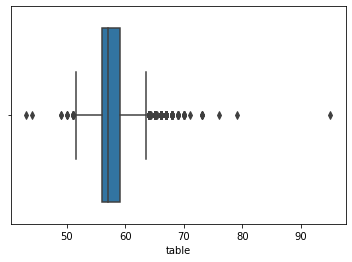

In [35]:
sns.boxplot(x = df5.table)

In [36]:
df5["table"].quantile(0.25)

56.0

In [37]:
Q1 = df5["table"].quantile(0.25)
Q3 = df5["table"].quantile(0.75)
IQR = Q3 - Q1
IQR

3.0

In [38]:
# np.percentile(df5["table"], 1)

In [39]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [51]:
outlier_low = df5[df5["table"] < lower_lim]  # küçük olan outlier ları temsil ediyor

In [41]:
outlier_high = df5[df5["table"] > upper_lim]  # upper limit ten büyük olan yani boxplot taki sağdaki değerleri verir

In [42]:
df5[((df5["table"] < lower_lim) | (df5["table"] > upper_lim))]  # table sütunu için toplam outlier ları getirelim.

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,Good,H,VVS2,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,Very Good,D,VVS2,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,Fair,G,SI1,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...,...,...,...
53695,0.75,Good,E,VS2,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,Fair,H,VVS2,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,Fair,G,VS1,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,Fair,F,VS2,55.4,64.0,2724,6.06,5.97,3.34


In [43]:
df5[~((df5["table"] < lower_lim) | (df5["table"] > upper_lim))]  # table sütunu için outlier olmayan değerleri getir..

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [44]:
df5_cleaned = df5[~((df5["table"] < lower_lim) | (df5["table"] > upper_lim))]  # outlier olmayan değerlerini değişkene atadık

<AxesSubplot:xlabel='table'>

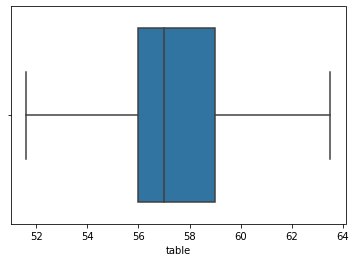

In [45]:
sns.boxplot(x = df5_cleaned.table)  # bu değişkenin boxplot ını çizdik

<AxesSubplot:xlabel='carat'>

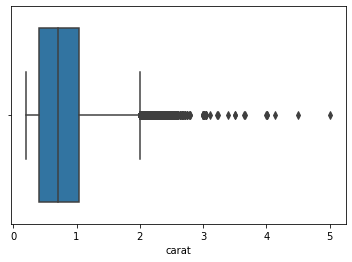

In [46]:
sns.boxplot(x = df5["carat"])  # sadece karat sütunu için bxplot table çizip outlier lara bakalım.

<AxesSubplot:xlabel='carat'>

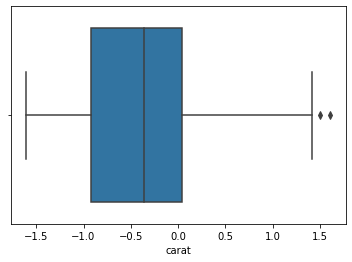

In [47]:
sns.boxplot(x = np.log(df5["carat"]))  # sağa sola kuyruklu olan yapılar için logaritma yöntemi kullanılabilir genellikle

## “winsorize” nedir?
### Verisetindeki uç değerlerin atılması yerine verisetindeki en yakın değerleri koyarak ortalamaya yaklaştırılmasını sağlayan istatistiki düzeltme tekniği

Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. It is named after the engineer-turned-biostatistician Charles P. Winsor (1895–1951)

In [48]:
from scipy.stats.mstats import winsorize

In [49]:
df_table_win = winsorize(df5["table"], (0.01, 0.02))  # df5["table"] kullanacağımız sütun, (0.01 ve 0.02) ise aralıklardır. 

<AxesSubplot:>

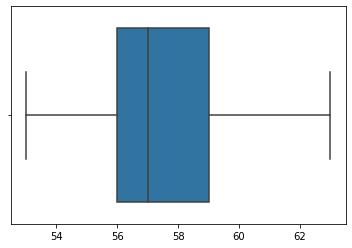

In [50]:
sns.boxplot(x = df_table_win)

## Eng session da ek bilgiler

In [52]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [53]:
df_table = df["table"] 

In [54]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1
IQR

3.0

In [55]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [56]:
outlier_low = df5[df_table < lower_lim]
outlier_high = df5[df_table > upper_lim]

In [57]:
df[((df_table < lower_lim) | (df_table > upper_lim))]  # gives all outliers

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [59]:
df[~((df_table < lower_lim) | (df_table > upper_lim))]  # gives all data except outliers

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [61]:
import matplotlib.pyplot as plt

<Figure size 864x432 with 0 Axes>

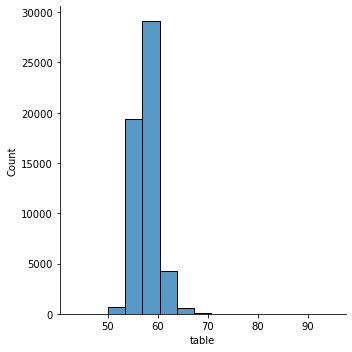

In [62]:
plt.figure(figsize = (12,6))
sns.displot(x=df_table, bins=15);

In [64]:
df_table_win=winsorize(df_table, (0.01,0.02))

In [65]:
df_table_win

masked_array(data=[55., 61., 63., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

<AxesSubplot:>

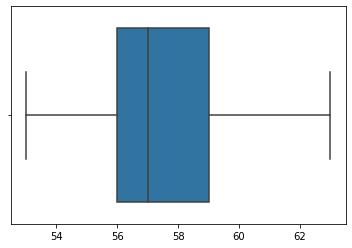

In [66]:
sns.boxplot(x=df_table_win)

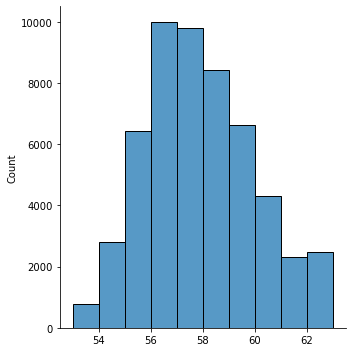

In [67]:
sns.displot(df_table_win, bins=10);

In [68]:
pd.DataFrame(df_table_win).describe()  # statistical measurements of our winsorized table column

,0
count,53940.000000
mean,57.434607
std,2.142774
min,53.000000
25%,56.000000
50%,57.000000
75%,59.000000
max,63.000000


In [69]:
df_table.describe()  # check and compare with the winsorized one

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [70]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [72]:
df_carat = df.carat

In [73]:
df_carat.shape

(53940,)

In [74]:
df_carat.head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

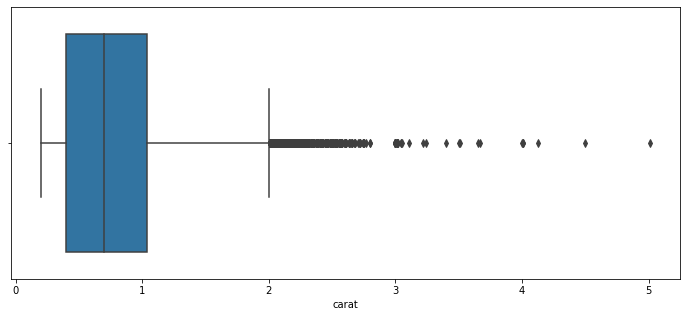

In [75]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df_carat);  # let's look if we have outliers for df_carat

<Figure size 864x360 with 0 Axes>

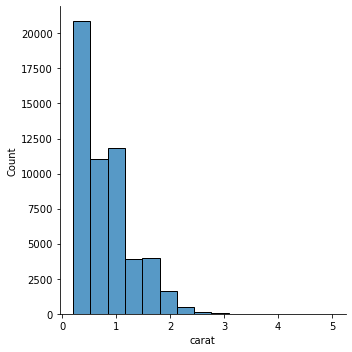

In [76]:
plt.figure(figsize=(12,5))
sns.displot(df_carat, bins=15)

In [77]:
df_carat_log=np.log(df_carat)
df_carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

<Figure size 864x360 with 0 Axes>

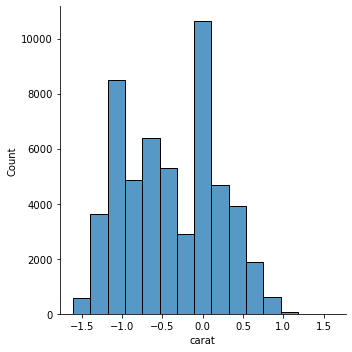

In [78]:
plt.figure(figsize=(12,5))
sns.displot(df_carat_log, bins=15)